In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')           # Turn off the warnings. 
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

In [31]:
df = sns.load_dataset('iris')
X= df.drop(columns=['species'])
Y= df['species']
head_X = X.columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [34]:
kmeans = KMeans(n_clusters= 3, random_state= 123)

In [35]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=123)

In [36]:
rs= pd.Series(kmeans.labels_)
rs

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Length: 150, dtype: int32

In [37]:
case0 = Y[rs==0]

In [38]:
case1 = Y[rs==1]

In [39]:
case2 = Y[rs==2]

In [40]:
print(case0.value_counts())
print(case2.value_counts())
print(case1.value_counts())

virginica     36
versicolor     2
Name: species, dtype: int64
versicolor    48
virginica     14
Name: species, dtype: int64
setosa    50
Name: species, dtype: int64


In [41]:
pd.DataFrame(kmeans.cluster_centers_,columns = head_X, index= ['cluster 0','Cluster 1','Cluster 3'])

,sepal_length,sepal_width,petal_length,petal_width
cluster 0,6.850000,3.073684,5.742105,2.071053
Cluster 1,5.006000,3.428000,1.462000,0.246000
Cluster 3,5.901613,2.748387,4.393548,1.433871


In [42]:
pd.DataFrame(kmeans.cluster_centers_,columns = head_X)

,sepal_length,sepal_width,petal_length,petal_width
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871


In [43]:
np.round(pd.DataFrame(kmeans.cluster_centers_,columns = head_X, index= ['cluster 0','Cluster 1','Cluster 3']))

,sepal_length,sepal_width,petal_length,petal_width
cluster 0,7.0,3.0,6.0,2.0
Cluster 1,5.0,3.0,1.0,0.0
Cluster 3,6.0,3.0,4.0,1.0


In [44]:
learnedLabels = ['Virginica','Setosa','Versicolor'] 

In [45]:
learnedLabels

['Virginica', 'Setosa', 'Versicolor']

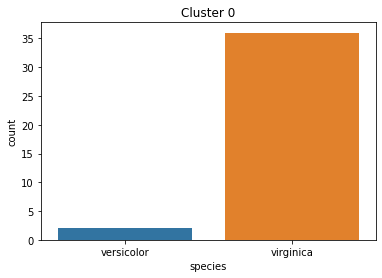

In [46]:
sns.countplot(case0).set_title("Cluster 0")
plt.show()

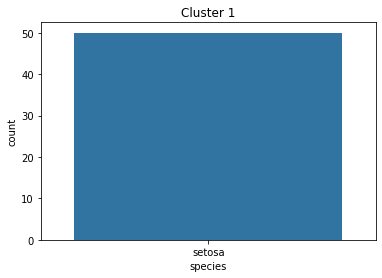

In [47]:
sns.countplot(case1).set_title("Cluster 1")
plt.show()

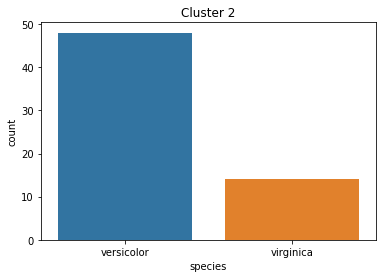

In [48]:
sns.countplot(case2).set_title("Cluster 2")
plt.show()

In [49]:


# For a given observation of X, predict the species from what we have learned. 
# Case #1.
X_test = {'sepal_length': [4.5] ,'sepal_width': [3.0] , 'petal_length': [5.0]  ,'petal_width': [1.5] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))



Predicted cluster 2 with the most probable label 'Versicolor'


In [50]:
X_test = print(pd.DataFrame(X_test))

   sepal_length  sepal_width  petal_length  petal_width
0           4.5          3.0           5.0          1.5


In [51]:
print(X_test)

None


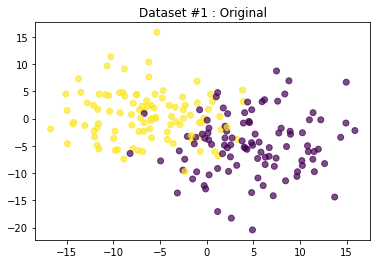

In [53]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

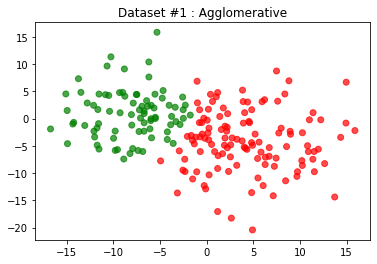

In [54]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : Agglomerative')
plt.show()

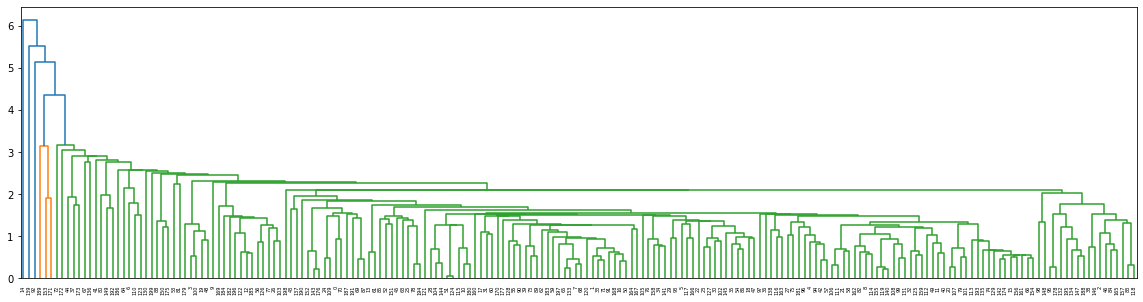

In [55]:
myLinkage = linkage(X1,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [56]:


# Dataset #1 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 5, criterion='distance')                      #  Cut at the height (distance) = 5 <= change this value at will.
pd.Series(labels).value_counts()



1    197
2      1
3      1
4      1
dtype: int64

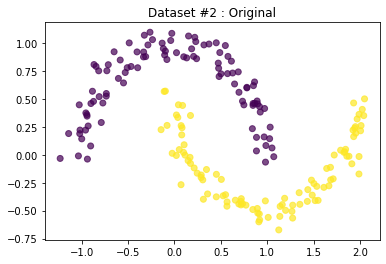

In [60]:
# Dataset #2.
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()






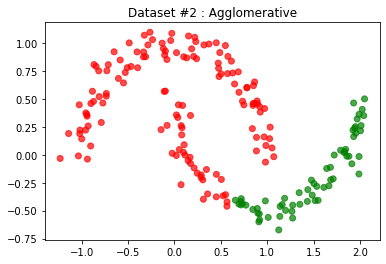

In [61]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Agglomerative')
plt.show()

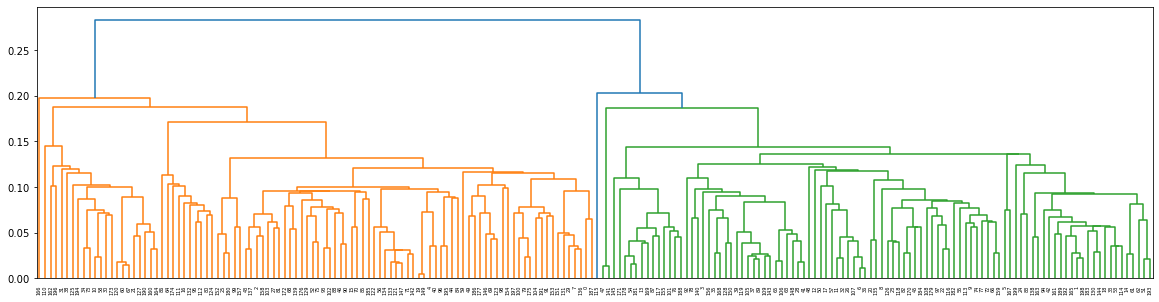

In [62]:
# Dataset #2 and show dendrogram.
myLinkage = linkage(X2,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [64]:



# Dataset #2 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 0.23, criterion='distance')                      #  Cut at the height (distance) = 0.23 <= change this value at will.
pd.Series(labels).value_counts()



1    100
2    100
dtype: int64

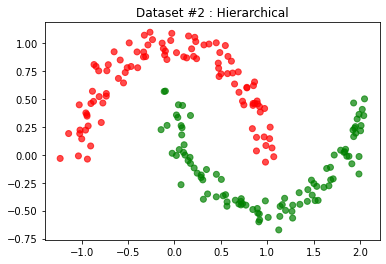

In [65]:
myColors = {1:'red',2:'green'}                                                # Define a color palette: 1~2.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Hierarchical')
plt.show()

# First Diagram and the clustering

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [96]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

In [119]:
dataset= make_blobs(n_samples= 200, centers= 4, n_features= 2, cluster_std= 1.6,random_state= 50)

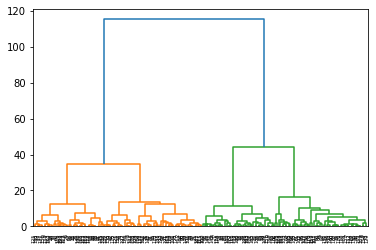

In [132]:
point = dataset[0]
dendrogram= sch.dendrogram(sch.linkage(point,method= 'ward'))

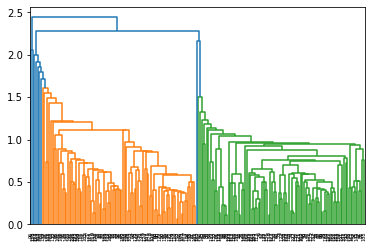

In [133]:
dendrogram= sch.dendrogram(sch.linkage(point,method= 'single'))

In [114]:
hc = AgglomerativeClustering(n_clusters=4, affinity ='euclidean', linkage='single')

In [115]:
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [116]:
y_hc= hc.fit_predict(point)

In [117]:
print(y_hc)

[1 2 1 1 2 2 1 2 2 2 2 1 2 1 2 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2
 2 1 1 1 2 1 1 2 2 1 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 2 2 1 2 1 1 1 2 2 1 2
 1 1 2 1 1 2 2 1 2 2 2 2 1 2 1 2 2 1 2 1 1 2 0 1 2 1 2 2 1 1 1 2 1 2 2 1 2
 2 1 1 2 1 1 1 1 2 3 1 1 1 2 1 1 1 1 2 2 2 2 1 1 1 2 1 1 2 1 1 1 2 2 1 2 1
 2 2 1 2 1 2 2 1 1 2 0 2 1 1 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 1 1 2 1 1 1 2
 2 2 1 1 2 1 1 2 1 2 1 2 1 2 1]


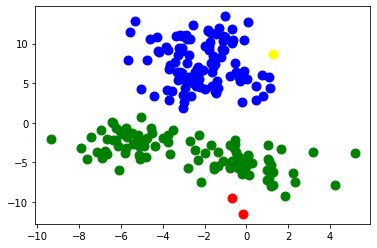

In [134]:
# this will plot the graphic the data set
plt.scatter(point[y_hc ==0,0], point[y_hc == 0,1], color = 'red', s=80)
plt.scatter(point[y_hc == 1,0], point[y_hc == 1,1], color = 'blue', s =80)
plt.scatter(point[y_hc == 2,0], point[y_hc == 2,1], color = 'green', s =80)
plt.scatter(point[y_hc == 3,0], point[y_hc == 3,1], color = 'yellow', s =80)

plt.show()


# First Clustering and then diagram

In [135]:
kmean = KMeans(n_clusters= 4)

KMeans(n_clusters=4)

In [143]:
clusters = kmean.cluster_centers_
y_km=kmean.fit_predict(point)

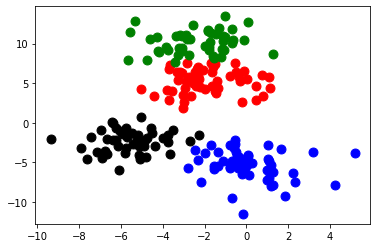

In [144]:
# Ploting the graph
plt.scatter(point[y_km == 0,0], point[y_km ==0,1], s = 80, color= 'red')
plt.scatter(point[y_km == 1,0], point[y_km ==1,1], s = 80, color= 'blue')
plt.scatter(point[y_km == 2,0], point[y_km ==2,1], s = 80, color= 'green')
plt.scatter(point[y_km == 3,0], point[y_km ==3,1], s = 80, color= 'black')